Estadística descriptiva:
              Edad      Ingresos  Satisfaccion
count  200.000000    200.000000    200.000000
mean    29.050000  29478.840000      9.501234
std      9.343662  10975.881571      0.920631
min      3.000000  -1907.000000      5.713099
25%     22.000000  22423.250000      9.314259
50%     29.500000  30475.000000     10.000000
75%     34.250000  36545.000000     10.000000
max     57.000000  58067.000000     10.000000

Moda:
 Edad              32.0
Ingresos       -1907.0
Satisfaccion      10.0
Name: 0, dtype: float64

Varianza:
 Edad            8.730402e+01
Ingresos        1.204700e+08
Satisfaccion    8.475608e-01
dtype: float64

Desviación estándar:
 Edad                9.343662
Ingresos        10975.881571
Satisfaccion        0.920631
dtype: float64

Correlaciones:
                   Edad  Ingresos  Satisfaccion
Edad          1.000000  0.894251      0.670543
Ingresos      0.894251  1.000000      0.713028
Satisfaccion  0.670543  0.713028      1.000000

MSE: 24011342.

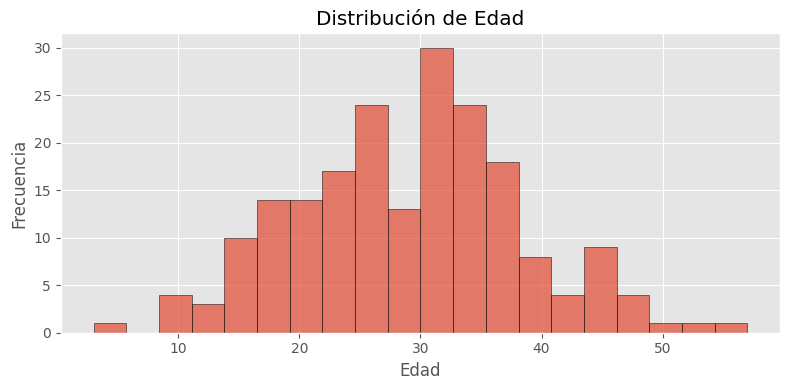

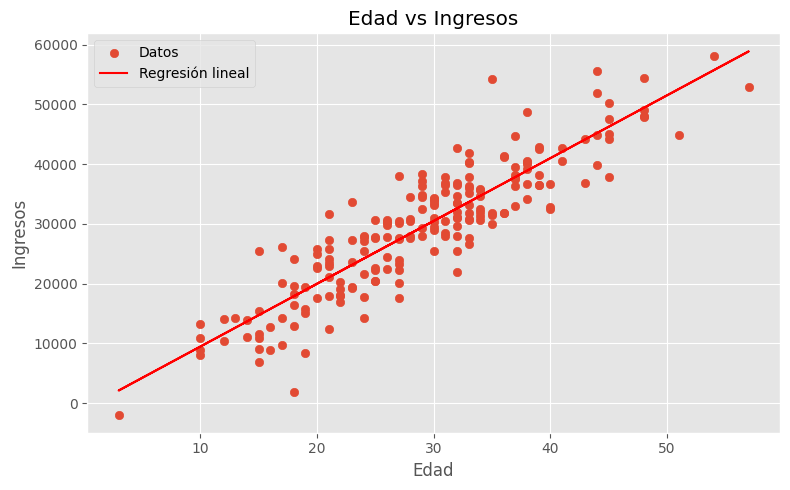

<ipython-input-1-29e2c591a3c3>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

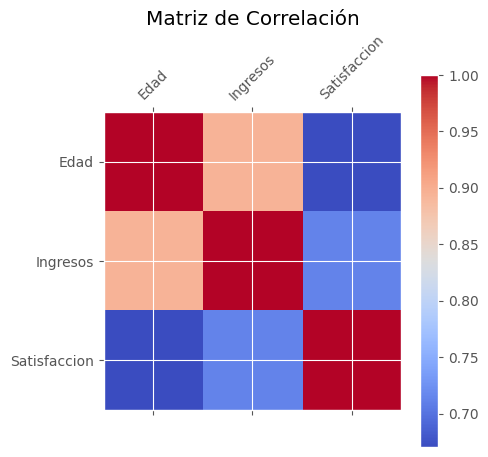

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generación de datos simulados
np.random.seed(42)
n = 200
edad = np.random.normal(30, 10, n).astype(int)
ingresos = (edad * 1000 + np.random.normal(0, 5000, n)).astype(int)
satisfaccion = np.clip((edad * 0.1 + ingresos / 10000 + np.random.normal(5, 1, n)), 1, 10)

# Crear DataFrame
df = pd.DataFrame({
    'Edad': edad,
    'Ingresos': ingresos,
    'Satisfaccion': satisfaccion
})

# Estadística descriptiva
descriptiva = df.describe()
print("Estadística descriptiva:\n", descriptiva)

# Moda
moda = df.mode().iloc[0]
print("\nModa:\n", moda)

# Varianza y desviación estándar
varianzas = df.var()
desviaciones = df.std()
print("\nVarianza:\n", varianzas)
print("\nDesviación estándar:\n", desviaciones)

# Correlación
correlaciones = df.corr()
print("\nCorrelaciones:\n", correlaciones)

# Regresión lineal: Ingresos vs Edad
X = df[['Edad']]
y = df['Ingresos']
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\nMSE:", mse)
print("R²:", r2)

# Visualizaciones
plt.style.use('ggplot')

# Histograma de edad
plt.figure(figsize=(8, 4))
plt.hist(df['Edad'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Diagrama de dispersión: Edad vs Ingresos
plt.figure(figsize=(8, 5))
plt.scatter(df['Edad'], df['Ingresos'], label='Datos')
plt.plot(df['Edad'], y_pred, color='red', label='Regresión lineal')
plt.title('Edad vs Ingresos')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.legend()
plt.tight_layout()
plt.show()

# Mapa de calor de correlación
plt.figure(figsize=(6, 4))
cax = plt.matshow(correlaciones, cmap='coolwarm')
plt.colorbar(cax)
plt.xticks(range(len(correlaciones.columns)), correlaciones.columns, rotation=45)
plt.yticks(range(len(correlaciones.columns)), correlaciones.columns)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()
